In [1]:
import pandas as pd

# Read the Excel file (no need to specify custom na_values)
df = pd.read_excel('../../data_set/hd_sessions/restructured_hd_session_data.xlsx')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3856 entries, 0 to 3855
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Subject_ID           3856 non-null   object        
 1   Session_No           3856 non-null   object        
 2   Date                 3843 non-null   datetime64[ns]
 3   AP (mmHg)            3849 non-null   float64       
 4   AUF (ml)             3220 non-null   object        
 5   BFR (ml/min)         3856 non-null   float64       
 6   BP (mmHg)            3854 non-null   object        
 7   Dry weight (kg)      3782 non-null   object        
 8   HD duration (h)      3856 non-null   object        
 9   PUF (ml)             3842 non-null   object        
 10  Post HD weight (kg)  3689 non-null   object        
 11  Pre HD weight (kg)   3851 non-null   object        
 12  TMP (mmHg)           3852 non-null   float64       
 13  VP (mmHg)            3836 non-nul

In [20]:
# List of columns to clean
columns_to_check = [
    'AP (mmHg)', 'AUF (ml)', 'BFR (ml/min)', 'Dry weight (kg)',
    'PUF (ml)', 'Post HD weight (kg)', 'Pre HD weight (kg)',
    'TMP (mmHg)', 'VP (mmHg)', 'Weight gain (kg)', 'SYS (mmHg)', 'DIA (mmHg)'
]

# Process each column
for col in columns_to_check:
    if col in df.columns:
        # Convert the entire column to numeric — any non-numeric becomes NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Compute mean excluding NaNs
        mean_val = round(df[col].mean(), 1)

        # Fill NaNs with the mean
        df[col] = df[col].fillna(mean_val)
    else:
        print(f"Column '{col}' not found in the dataset.")

In [21]:
import re


def convert_to_hours(val):
    """Convert strings like '3h 15min', '40min' to hours as float"""
    if pd.isna(val):
        return None
    try:
        # If already numeric, return as float
        return float(val)
    except:
        val = str(val).lower().strip()
        hours = 0
        minutes = 0

        # Extract hours and minutes using regex
        hour_match = re.search(r'(\d+)\s*h', val)
        minute_match = re.search(r'(\d+)\s*min', val)

        if hour_match:
            hours = int(hour_match.group(1))
        if minute_match:
            minutes = int(minute_match.group(1))

        return round(hours + minutes / 60, 2)

# Process the HD duration (h) column
if 'HD duration (h)' in df.columns:
    df['HD duration (h)'] = df['HD duration (h)'].apply(convert_to_hours)

    # Replace NaN with rounded mean
    mean_val = round(df['HD duration (h)'].mean(), 1)
    df['HD duration (h)'] = df['HD duration (h)'].fillna(mean_val)

    # round all values to 1 decimal place
    df['HD duration (h)'] = df['HD duration (h)'].round(1)
else:
    print("Column 'HD duration (h)' not found in the dataset.")

In [22]:
# drop the original BP column
df.drop(columns=['BP (mmHg)'], inplace=True)

In [23]:
df.to_excel('data_cleaned.xlsx', index=False)

In [24]:
df.columns

Index(['Subject_ID', 'Session_No', 'Date', 'AP (mmHg)', 'AUF (ml)',
       'BFR (ml/min)', 'Dry weight (kg)', 'HD duration (h)', 'PUF (ml)',
       'Post HD weight (kg)', 'Pre HD weight (kg)', 'TMP (mmHg)', 'VP (mmHg)',
       'Weight gain (kg)', 'SYS (mmHg)', 'DIA (mmHg)'],
      dtype='object')

In [25]:
df.drop(columns=['Subject_ID', 'Session_No', 'Date'], inplace=True)

<Axes: >

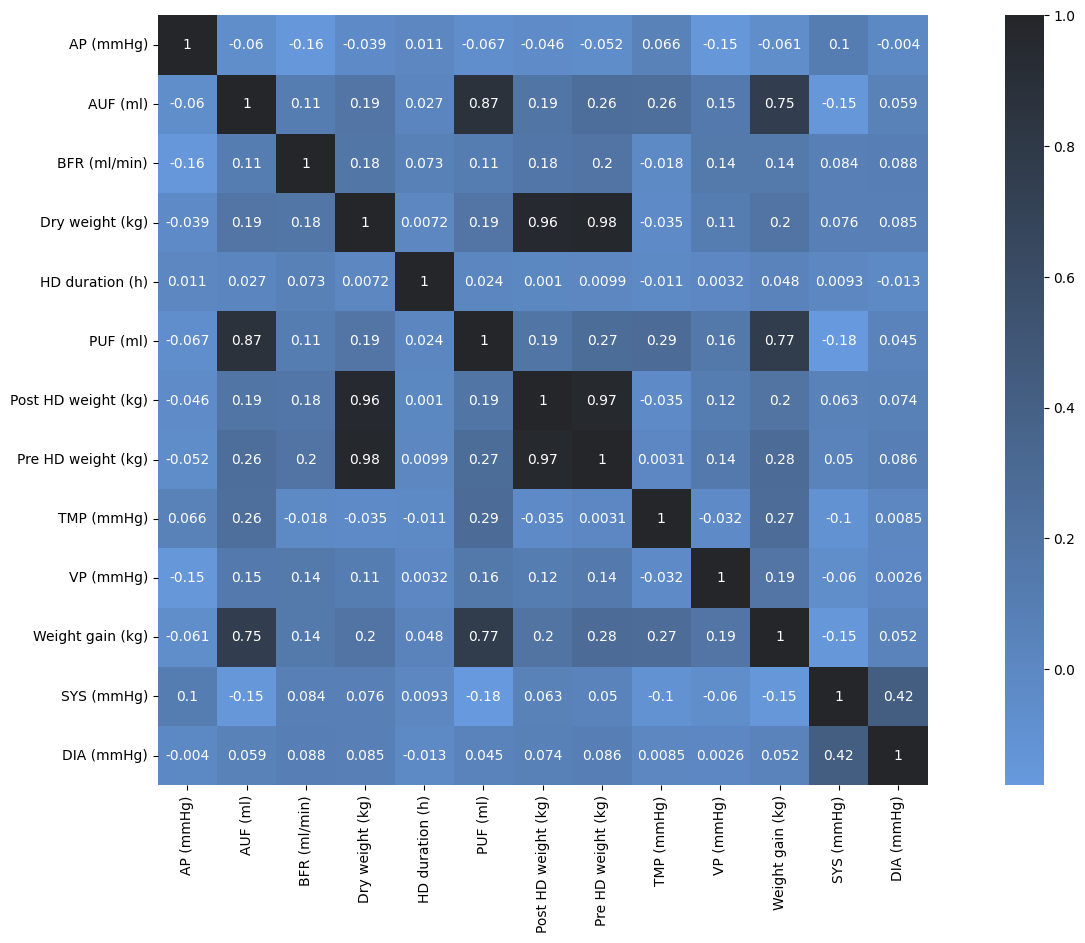

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

f, ax = plt.subplots(figsize=(20, 10))
corr = df.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
            square=True, ax=ax,annot=True)